In [24]:
import numpy as np

# Fungsi untuk membuat sliding window
def create_sliding_window(data, window_size, n_predictions):
    X, y = [], []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + n_predictions])
    return np.array(X), np.array(y)

# Misal kamu punya data 1000 angka aritmatika
data = np.arange(1000, 6000, 10)  # Sebagai contoh deret aritmatika

# Menggunakan 10 angka sebelumnya untuk memprediksi 5 angka berikutnya
X, y = create_sliding_window(data, window_size=10, n_predictions=5)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (486, 10)
y shape: (486, 5)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Prediksi 5 angka berikutnya setelah data testing
y_pred = model.predict(X_test)

# Cetak hasil prediksi
print("Prediksi angka:", y_pred[0])  # Prediksi pertama
print("Target asli:", y_test[0])     # Target asli


Prediksi angka: [5300. 5310. 5320. 5330. 5340.]
Target asli: [5300 5310 5320 5330 5340]


In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print (X_train)
print (y_train)
print (X_test)
print (y_test)

# Inisialisasi model regresi
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Tampilkan hasil prediksi
print("Prediksi:", y_pred)
print("Target Asli:", y_test)


[[ 3500  4000  4500]
 [ 8500  9000  9500]
 [ 6500  7000  7500]
 [ 8000  8500  9000]
 [ 5000  5500  6000]
 [ 7500  8000  8500]
 [ 2000  2500  3000]
 [ 5500  6000  6500]
 [ 9000  9500 10000]
 [ 3000  3500  4000]
 [ 4500  5000  5500]
 [ 6000  6500  7000]
 [ 7000  7500  8000]
 [ 2500  3000  3500]
 [ 4000  4500  5000]]
[ 5000 10000  8000  9500  6500  9000  3500  7000 10500  4500  6000  7500
  8500  4000  5500]
[[1000 1500 2000]
 [1500 2000 2500]]
[2500 3000]
Prediksi: [2500. 3000.]
Target Asli: [2500 3000]


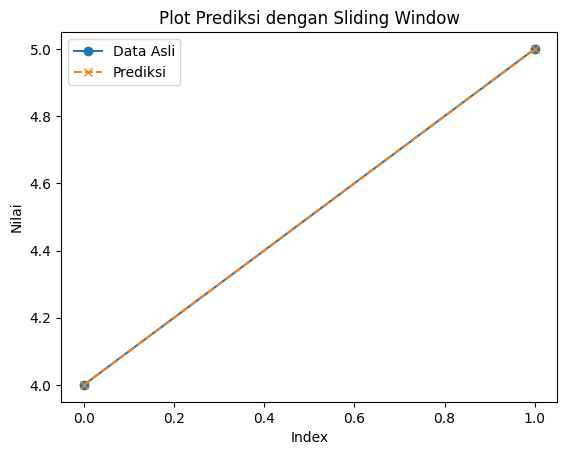

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil prediksi vs data asli
plt.plot(np.arange(len(y_test)), y_test, label='Data Asli', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Prediksi', marker='x', linestyle='--')

plt.title('Plot Prediksi dengan Sliding Window')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.legend()

# Tampilkan plot
plt.show()


In [38]:
# Load the data from Excel file
import pandas as pd
data = pd.read_excel("lotteryNumberPredictor-main/previous_data.xlsx")

# Split the data into features (X) and target (y)
X = data[['1st_number', '2nd_number', '3rd_number', '4th_number', '5th_number', '6th_number']]
y = data[['1st_number', '2nd_number', '3rd_number', '4th_number', '5th_number', '6th_number']].shift(-1)

In [39]:
X.info

<bound method DataFrame.info of      1st_number  2nd_number  3rd_number  4th_number  5th_number  6th_number
0            12          18          19          25          67           7
1            21          33          36          45          56          12
2             7          16          24          61          62           2
3             2           7          18          26          31          12
4            31          45          49          56          70          11
..          ...         ...         ...         ...         ...         ...
556           7           9          18          29          39          13
557           1           4          50          54          59          17
558           9          15          46          55          57           4
559          20          29          30          52          58          19
560          23          24          35          40          43           1

[561 rows x 6 columns]>

In [40]:
y.info

<bound method DataFrame.info of      1st_number  2nd_number  3rd_number  4th_number  5th_number  6th_number
0          21.0        33.0        36.0        45.0        56.0        12.0
1           7.0        16.0        24.0        61.0        62.0         2.0
2           2.0         7.0        18.0        26.0        31.0        12.0
3          31.0        45.0        49.0        56.0        70.0        11.0
4           6.0        23.0        63.0        66.0        73.0         9.0
..          ...         ...         ...         ...         ...         ...
556         1.0         4.0        50.0        54.0        59.0        17.0
557         9.0        15.0        46.0        55.0        57.0         4.0
558        20.0        29.0        30.0        52.0        58.0        19.0
559        23.0        24.0        35.0        40.0        43.0         1.0
560         NaN         NaN         NaN         NaN         NaN         NaN

[561 rows x 6 columns]>

In [37]:
from sklearn.ensemble import RandomForestRegressor
import random as randint

# Train a Random Forest Regression model\
model = RandomForestRegressor(n_estimators=1000, random_state=None)
model.fit(X, y)

# Generate a new set of random features for prediction
new_data = pd.DataFrame({
    "1st_number": [randint(1, 70) for _ in range(100)],
    "2nd_number": [randint(1, 70) for _ in range(100)],
    "3rd_number": [randint(1, 70) for _ in range(100)],
    "4th_number": [randint(1, 70) for _ in range(100)],
    "5th_number": [randint(1, 70) for _ in range(100)],
    "6th_number": [randint(1, 25) for _ in range(100)],
})

# Use the trained model to predict the next 6 numbers for each set of features
predictions = model.predict(new_data)

# Get the most likely set of numbers based on the predictions
most_likely_set = predictions[0]
for p in predictions:
    if p[0] > most_likely_set[0]:
        most_likely_set = p

# Convert most_likely_set to whole numbers
rounded_most_likely_set = [round(x) for x in most_likely_set]

# Print the most likely set of numbers
print(str(f"{i+1:02d}") + ". The most likely set of numbers is:", rounded_most_likely_set)


TypeError: 'module' object is not callable